This is an exploration of the results of the CO calibration

In [2]:
import csv
import json
import pandas as pd
import os
from datetime import datetime
from pytz import timezone
import matplotlib.pyplot as plt
import datetime
import urllib
import numpy as np
import plotly.graph_objects as go

Vizualizing the uncorrected data that was initially fetched

In [7]:
uncorrected_df = pd.read_csv("uncorrected_co.csv")

print(uncorrected_df)
print(uncorrected_df["co_wrk_aux"].describe())



       Unnamed: 0  co_wrk_aux       temp  node_id            timestamp
0               0    0.080260  20.315713      250  2022-09-01 03:00:00
1               1    0.069783  20.451469      250  2022-09-01 04:00:00
2               2    0.082974  19.518393      250  2022-09-01 05:00:00
3               3    0.131306  19.406088      250  2022-09-01 06:00:00
4               4    0.082328  23.132333      250  2022-09-01 07:00:00
...           ...         ...        ...      ...                  ...
96019        2128    0.123030  20.029850      268  2023-06-13 06:00:00
96020        2129    0.135880  20.776800      268  2023-06-13 07:00:00
96021        2130    0.137890  21.527480      268  2023-06-13 08:00:00
96022        2131    0.154550  22.657390      268  2023-06-13 09:00:00
96023        2132    0.137060  25.123720      268  2023-06-13 10:00:00

[96024 rows x 5 columns]
count    96024.000000
mean         0.104728
std          0.088466
min         -2.933492
25%          0.061400
50%         

In [13]:
# for all of the timestamps in the dataframe, get the amount of unique nodes that have a reading for that time stamp


unique_nodes_count = uncorrected_df.groupby('timestamp')['node_id'].nunique()
print(unique_nodes_count)


timestamp
2022-09-01 03:00:00     7
2022-09-01 04:00:00     7
2022-09-01 05:00:00     7
2022-09-01 06:00:00     7
2022-09-01 07:00:00     7
                       ..
2023-06-13 11:00:00    12
2023-06-13 12:00:00    12
2023-06-13 13:00:00    11
2023-06-13 14:00:00    11
2023-06-13 15:00:00    11
Name: node_id, Length: 6851, dtype: int64


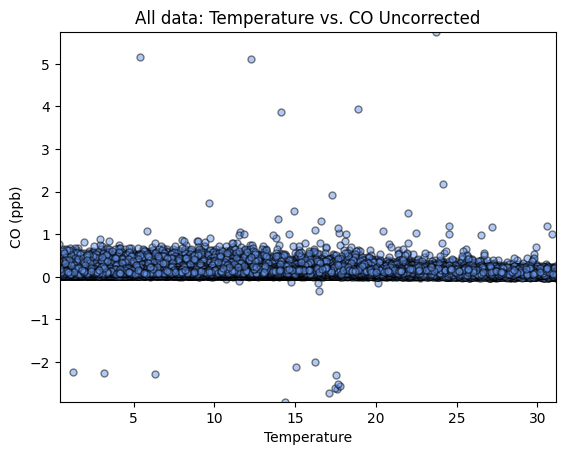

In [11]:
# just vizualize the data pre calibration 

def make_plot(data,title):

    x_min = data['temp'].quantile(0.05) # exclude 5% of lowest values
    x_max = data['temp'].quantile(0.95) # exclude 5% of highest values

    #get the largest value of CO
    y_max = data['co_wrk_aux'].max()
    y_min = data['co_wrk_aux'].min()

    # create a scatter plot with adjusted color and size
    plt.scatter(data['temp'], data['co_wrk_aux'], color='cornflowerblue', s=25,edgecolor='black', alpha=0.5)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max) # set y-axis range

    # add labels and title
    plt.xlabel('Temperature')
    plt.ylabel('CO (ppb)')
    plt.title(title + ': Temperature vs. CO Uncorrected')

    # display the plot
    plt.show()



make_plot(uncorrected_df,'All data')


Vizualizing the results of the correction

In [8]:
# load data from a CSV file
df = pd.read_csv('new_corrected_co.csv')
print("CO Summary")
print(df["CO_ppb"].describe())
print(" ")
print("Temperature Summary")
print(df["temp"].describe())

#size of the data
print(df.size)

CO Summary
count    75508.000000
mean         0.390735
std          0.525987
min         -4.596291
25%          0.175179
50%          0.218531
75%          0.306764
max         12.189533
Name: CO_ppb, dtype: float64
 
Temperature Summary
count    75508.000000
mean        10.773304
std         14.011707
min       -999.000000
25%          5.137988
50%         10.197398
75%         16.244522
max         29.996574
Name: temp, dtype: float64
755080


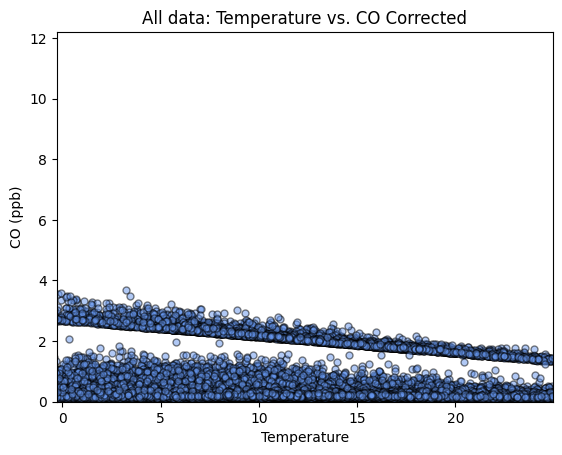

In [9]:

import matplotlib.pyplot as plt




def make_plot(data,title):

    x_min = data['temp'].quantile(0.05) # exclude 5% of lowest values
    x_max = data['temp'].quantile(0.95) # exclude 5% of highest values

    #get the largest value of CO
    y_max = data['CO_ppb'].max()
    y_min = data['CO_ppb'].min()

    # create a scatter plot with adjusted color and size
    plt.scatter(data['temp'], data['CO_ppb'], color='cornflowerblue', s=25,edgecolor='black', alpha=0.5)
    plt.xlim(x_min, x_max)
    plt.ylim(0, y_max) # set y-axis range

    # add labels and title
    plt.xlabel('Temperature')
    plt.ylabel('CO (ppb)')
    plt.title(title + ': Temperature vs. CO Corrected')

    # display the plot
    plt.show()



make_plot(df,'All data')



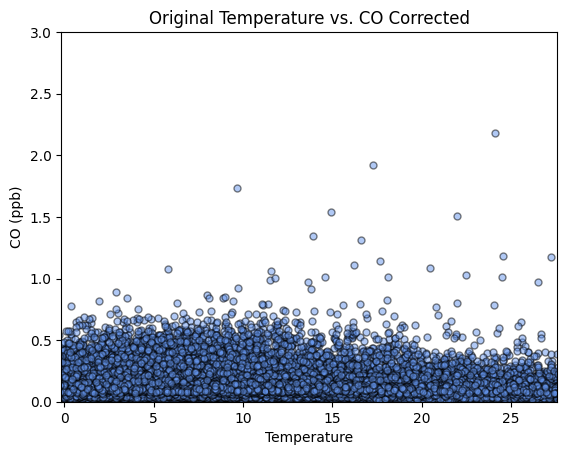

In [10]:
#Comparing to the non corrected data
df2 = pd.read_csv('uncorrected_co.csv')

x_min = df2['temp'].quantile(0.05) # exclude 5% of lowest values
x_max = df2['temp'].quantile(0.95) # exclude 5% of highest values

    #get the largest value of CO
y_max = df2['co_wrk_aux'].max()
y_min = df2['co_wrk_aux'].min()

    # create a scatter plot with adjusted color and size
plt.scatter(df2['temp'], df2['co_wrk_aux'], color='cornflowerblue', s=25,edgecolor='black', alpha=0.5)
plt.xlim(x_min, x_max)
plt.ylim(0, 3) # set y-axis range

    # add labels and title
plt.xlabel('Temperature')
plt.ylabel('CO (ppb)')
plt.title('Original Temperature vs. CO Corrected')

    # display the plot
plt.show()

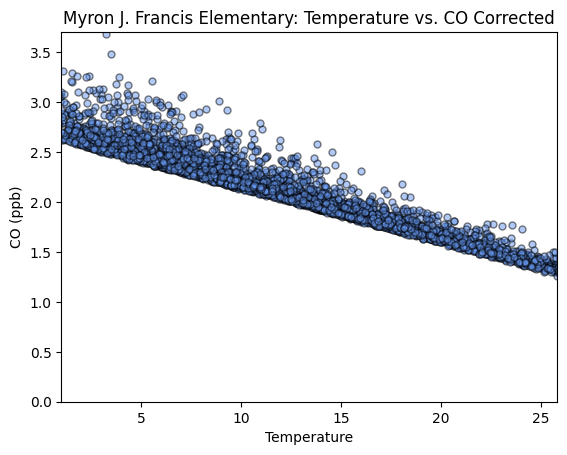

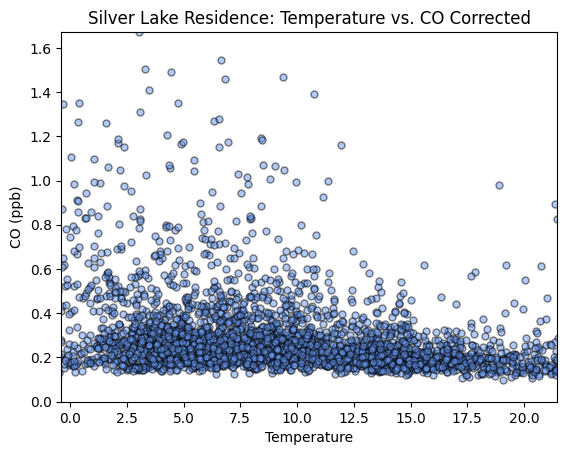

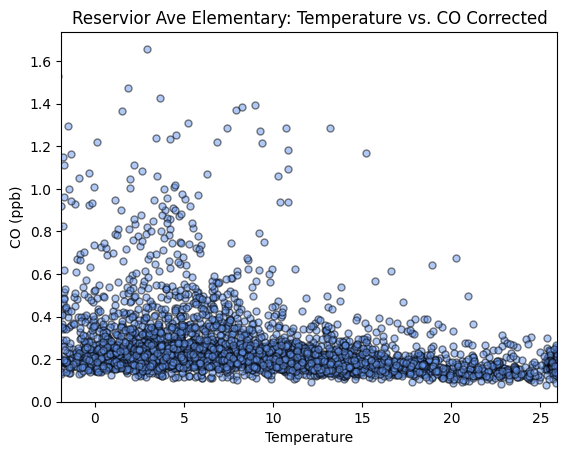

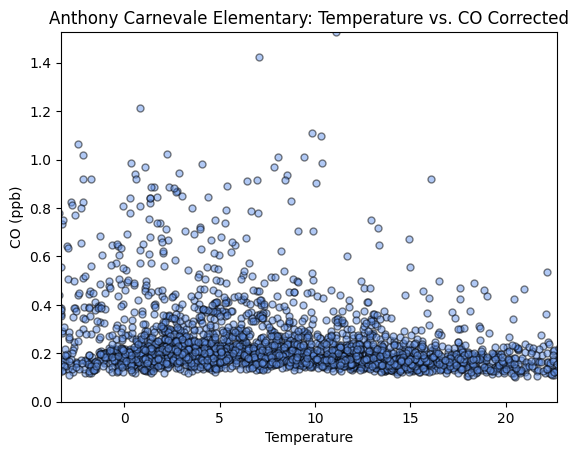

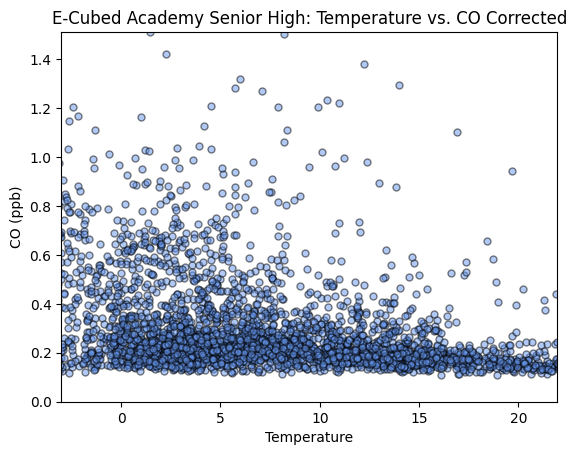

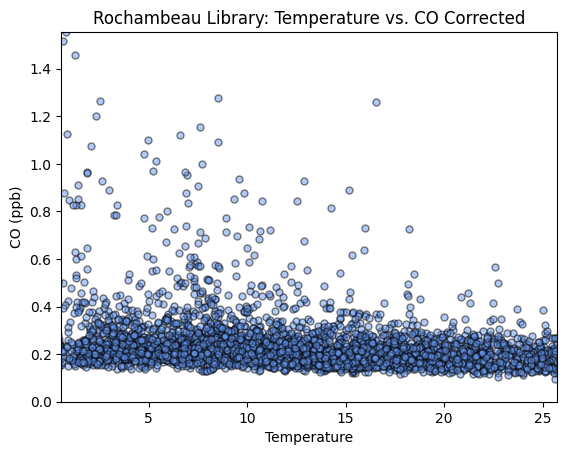

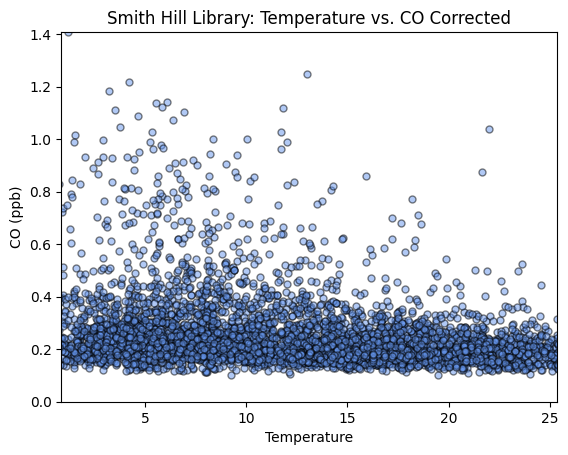

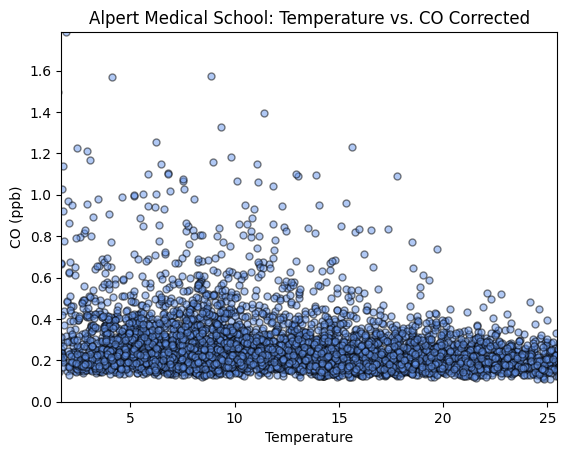

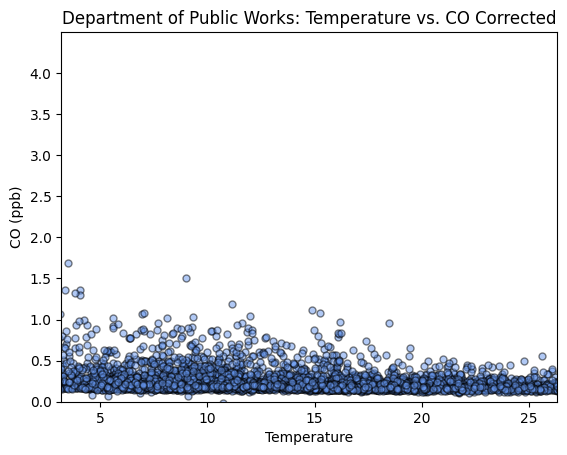

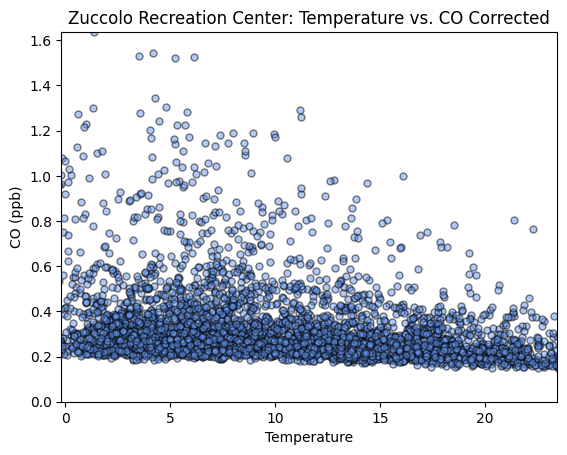

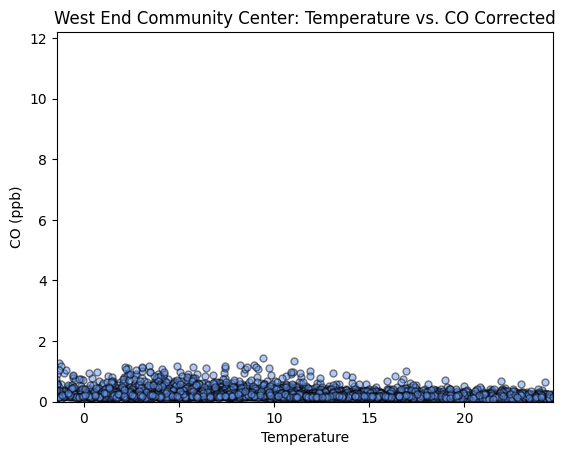

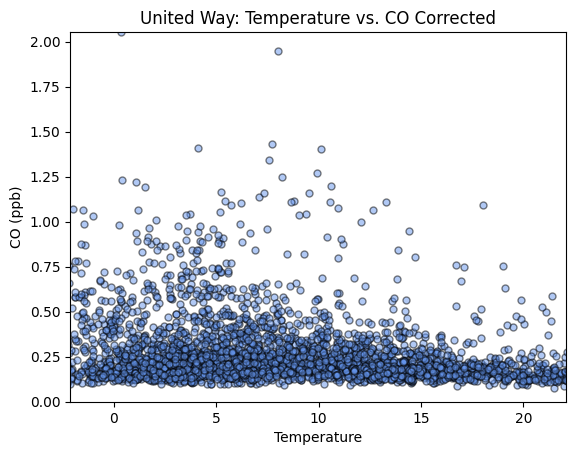

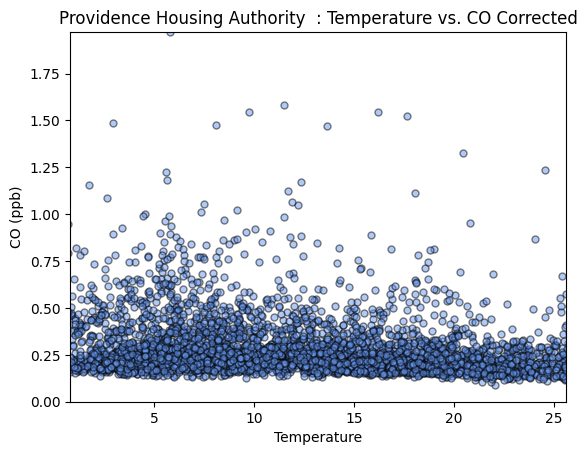

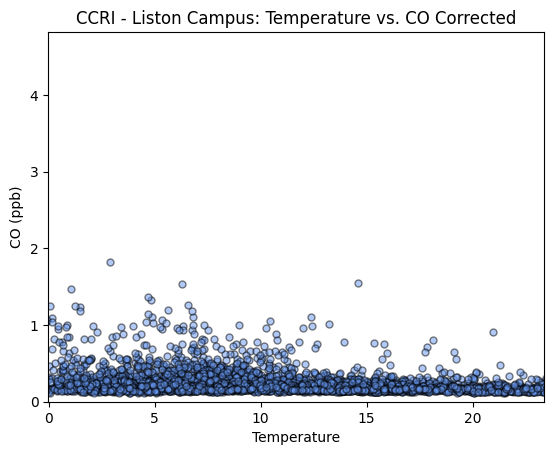

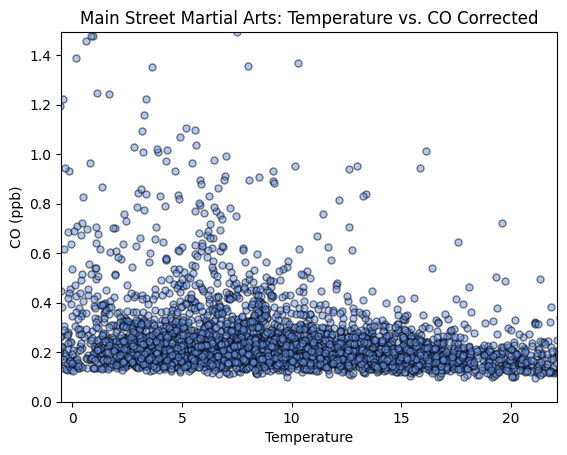

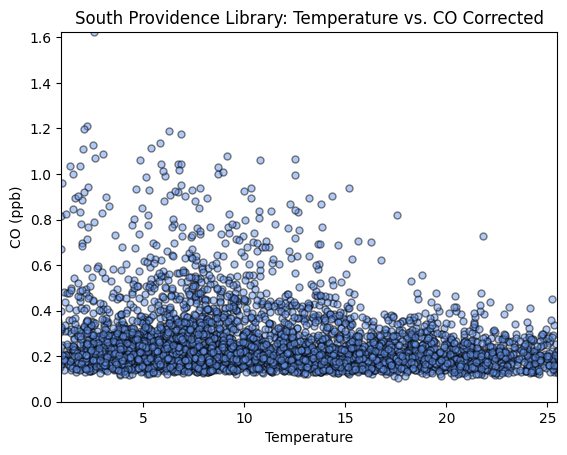

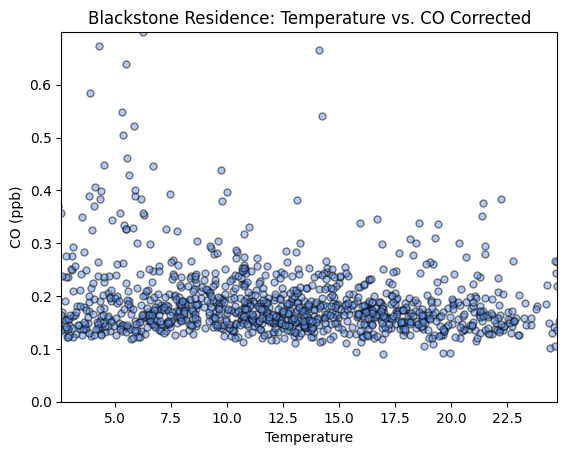

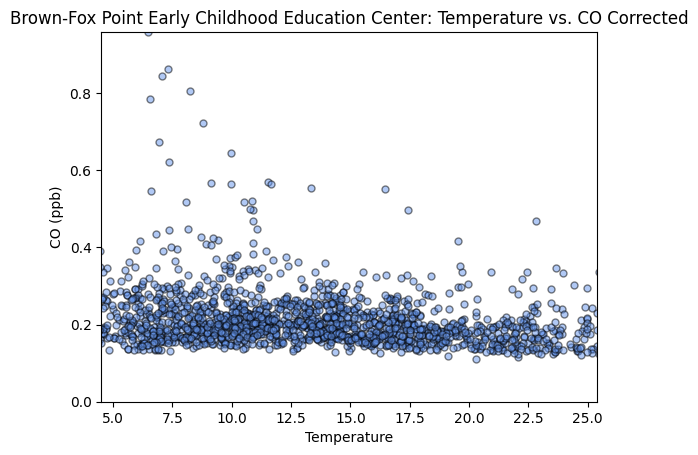

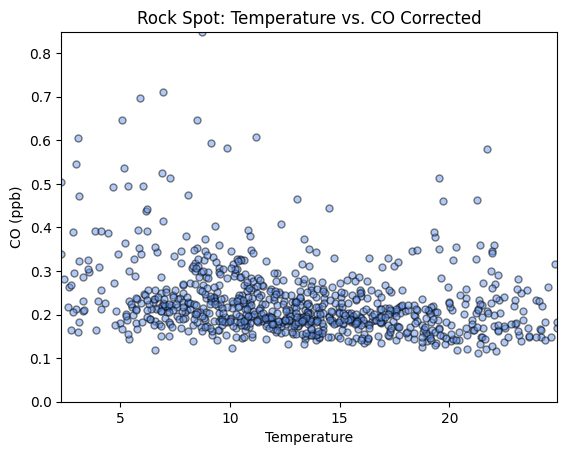

In [11]:
#display the plots for each of the nodes

node_list = pd.read_csv("co_lookup_with_sensors.csv")
node_list = node_list.dropna(subset=['Node ID'])
node_list["Node ID"] = node_list["Node ID"].apply(lambda x: int(str(x)[0:3]))
node_list = list(node_list["Node ID"])

df_nodes = list(df["Node ID"])

for node in node_list:
    # filter df to only include the current node
    node_df = df[df["Node ID"] == node]

    name = str(node_df["Location"].iloc[0])
    make_plot(node_df,name)
    

[0.0, 0.1, 0.2, 0.5, 0.7, 1.0, 1.5, 2.0, 2.5, 3.0]


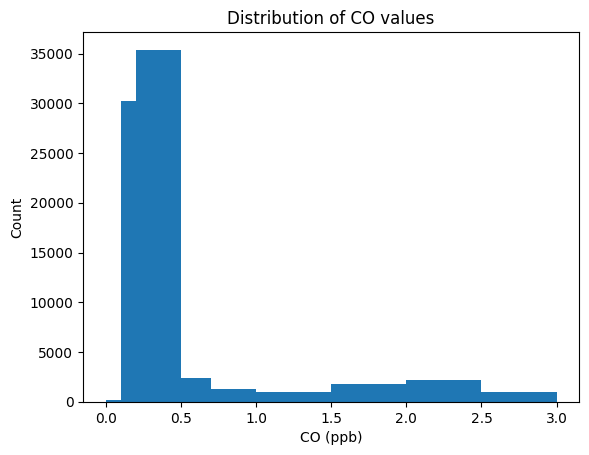

Number of values less than 0.1: 232
Number of values more than 3.0: 136
Mean: 0.3907347394002916
Mean for node 250: 2.113533403108563
Mean for node 254: 0.2809805649677109
Mean for node 258: 0.24807649646394314
Mean for node 261: 0.23421794555257294
Mean for node 264: 0.2824765843945273
Mean for node 267: 0.2319855634915203
Mean for node 270: 0.24823700859505698
Mean for node 274: 0.2605254750543993
Mean for node 276: 0.23268318359253587
Mean for node 251: 0.3140496327075156
Mean for node 252: 0.2522675711310329
Mean for node 255: 0.26019154866449157
Mean for node 257: 0.2733850488521014
Mean for node 259: 0.24067568086708596
Mean for node 262: 0.24640658088032483
Mean for node 263: 0.2515834713105648
Mean for node 266: 0.18707151285989299
Mean for node 269: 0.20861271700001321
Mean for node 268: 0.22988379020170552


In [13]:
# plot the range of values for CO

# create a histogram
bin_edges = [0.0,0.1,0.2,0.5,0.7,1.0,1.5,2.0,2.5,3.0]
print(bin_edges)

# create the histogram using matplotlib
plt.hist(df['CO_ppb'], bins=bin_edges)

# add labels and title
plt.xlabel('CO (ppb)')
plt.ylabel('Count')
plt.title('Distribution of CO values')

# display the plot
plt.show()

# Count the amount of values that are less thatn 0.1
print("Number of values less than 0.1: " + str(len(df[df["CO_ppb"] < 0.1])))
print("Number of values more than 3.0: " + str(len(df[df["CO_ppb"] > 3.0])))
print("Mean: " + str(df['CO_ppb'].mean()))


# Get the mean for each sensor
for node in node_list:
    # filter df to only include the current node
    node_df = df[df["Node ID"] == node]
    print("Mean for node " + str(node) + ": " + str(node_df['CO_ppb'].mean()))



